1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


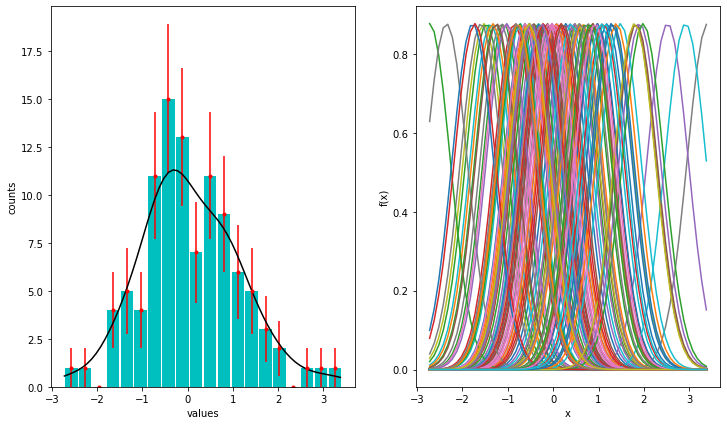

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.stats import norm
import pandas as pd
N=100
mean=0
dev=1
c=np.random.normal(mean,dev,N) #ramdom samples from a normal distribution with mean= 0 and deviation=1
#print(c)

f,(g1,g2)=plt.subplots(nrows=1,ncols=2, figsize=(12,7))
h,edges,_=g1.hist(c,bins=20, histtype='barstacked',rwidth=0.9, color='c')

#relocate the error bar to be on the middle of the bar, since edges is an array with the intervals we make this
midd= np.array([edges[i-1]+(edges[i]-edges[i-1])/2 for i in range(1,len(edges))])

g1.errorbar(midd, h, yerr = np.sqrt(h), fmt = 'r.')

g1.set_xlabel('values')
g1.set_ylabel('counts')

#GAUSSIANS PLOT

std=np.array([sc.stats.norm(i,1.06*c.std()*c.size**(-1/5)) for i in c])

#aux is the range of the x axis i create it so the code is more leggible
aux=np.arange(edges[0],edges[len(edges)-1],0.1)

gauss=[]
for i in range(c.size):
    g2.plot(aux,std[i].pdf(aux))
    gauss.append(std[i].pdf(aux))
    
g2.set_xlabel('x')
g2.set_ylabel('f(x)')

#sum of the gaussian plots and normalization
gauss2=np.sum(gauss,axis=0)
gauss3=sc.integrate.trapz(gauss2,aux)
gauss2 /= gauss3

#with this operation the normalized gaussian fit into the original histogram
g1.plot(aux,gauss2*(edges[1]-edges[0])*np.sum(h),color='black')
plt.show()


    

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

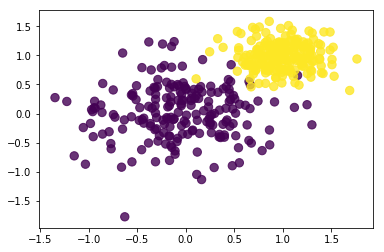

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

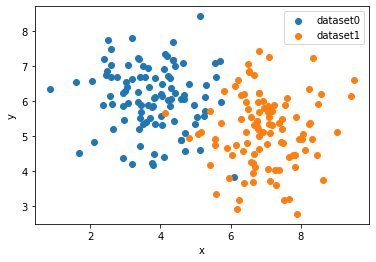

In [91]:

def scat_fun(mean1,mean2,dev,n):
    s1=np.random.normal(mean1,dev,n)
    s2=np.random.normal(mean2,dev,n)
    return s1,s2

categories=2
points=100

for i in range(categories):
    
    gr1,gr2=scat_fun(np.random.randint(10),np.random.randint(10),np.random.randint(2),points)
    plt.scatter(gr1,gr2, label='dataset'+ str(i))

    
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [95]:
#equivalent command for wget on windows
!curl  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
    

301 Moved Permanently

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   142    0   142    0     0    228      0 --:--:-- --:--:-- --:--:--   229



The resource has been moved to /s/raw/hgnvyj9abatk8g6/residuals_261.npy;
you should be redirected automatically.




intercept: -0.15432816763069473 
 slope:  0.0032597701220305835


<ErrorbarContainer object of 3 artists>

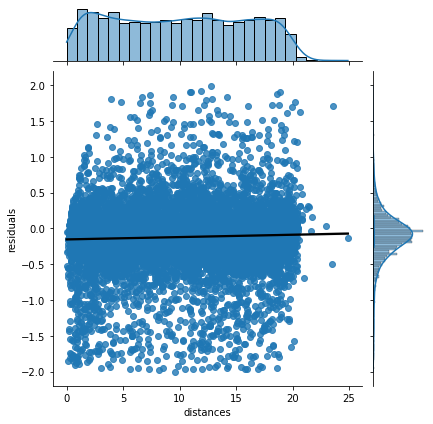

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


df=pd.DataFrame(np.load('residuals_261.npy',allow_pickle=True).item())
df2=df[abs(df['residuals'])<2]
df2

linreg=linregress(df2['distances'],df2['residuals'])
print('intercept:',linreg.intercept,'\n','slope: ', linreg.slope)


#sns.jointplot(x='distances',y='residuals', data=df2, kind='reg',joint_kws={'line_kws':{'color':'black'}})



x=np.arange(0,20,2)
num=(x[1]-x[0])/2
x=[int(i+num) for i in x]

j=0
y=[]
yerr=[]
for i in x:
    provisional=df2['residuals'][j:i]
    j=i
    y.append(np.mean(provisional))
    yerr.append(np.std(provisional))
    
sns.jointplot(x='distances',y='residuals', data=df2, kind='reg',joint_kws={'line_kws':{'color':'black'}})
plt.errorbar(x=x,y=y,yerr=yerr, fmt='')


<ErrorbarContainer object of 3 artists>

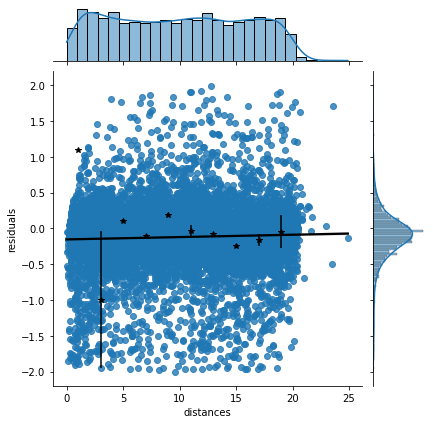

In [8]:
graf=sns.jointplot(x='distances',y='residuals', data=df2, kind='reg',joint_kws={'line_kws':{'color':'black'}})
graf.ax_joint.errorbar(x, y, yerr=yerr, fmt='*', c='black' )
